In [5]:
#Here's some code for the final project; I'm basing this off of these kernels here: 
    #https://www.kaggle.com/samiozsoy/the-nature-conservancy-fisheries-monitoring/fish-detection
    #https://www.kaggle.com/anokas/the-nature-conservancy-fisheries-monitoring/finding-boatids
    #This may also be useful: https://www.quora.com/How-do-I-read-image-data-for-CNN-in-python
#I'm hoping the fact that we're in python 2.7 won't affect too much
import os 
from scipy import ndimage
from subprocess import check_output
import random as rand #this will help us randomly select pictures from the training set to analyze

import cv2 #We're gonna need this, but I'm not sure if we already have this or not.
#cv2.path.append('C:\Users\sgbru\Anaconda2\Lib\site-packages')
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
print "Everything has imported fine! Let's get to analyzing some pictures."

Everything has imported fine! Let's get to analyzing some pictures.


<type 'numpy.ndarray'>
(720L, 1280L)


(<matplotlib.axes._subplots.AxesSubplot at 0x88147b8>,
 <matplotlib.image.AxesImage at 0x868d080>)

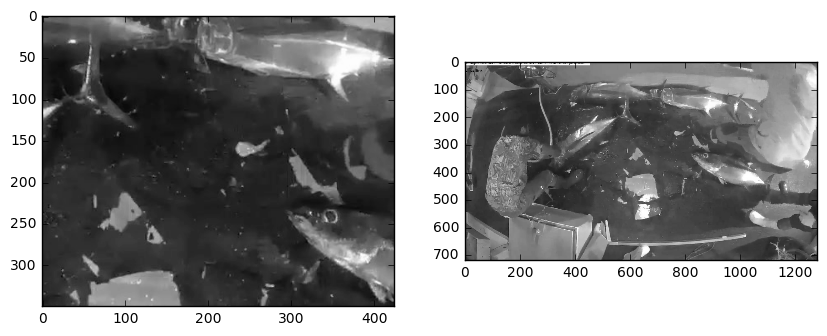

In [2]:
#I imagine once I get the stuff with OpenCV straightened out, this is how we should read the pictures into a dataframe/array
#NOTE: Came directly from samiozsoy's kernel
img_rows, img_cols= 350, 425
im_array = cv2.imread('C:/Users/sgbru/Desktop/IntroToDataScience/train/ALB/img_00003.jpg',0)
print type(im_array)
print np.shape(im_array)
#print im_array[0][0]
template = np.zeros([img_rows, img_cols], dtype='uint8') # initialisation of the template
template[:, :] = im_array[100:450,525:950] # (comment from source kernel) I try multiple times to find the correct rectangle. 


plt.subplots(figsize=(10, 7))
plt.subplot(121),plt.imshow(template, cmap='gray') 
plt.subplot(122), plt.imshow(im_array, cmap='gray')

In [3]:
import glob
from scipy.misc import imread
#So it's reading in one image correctly, now I'm going to try to read in a group of the pictures based on anokas' kernel
select = 600 #He used 500; I'm going to try 600 just to see if everything will work okay.
# Data loading
train_files = sorted(glob.glob('C:/Users/sgbru/Desktop/IntroToDataScience/train/*/*.jpg'), key=lambda x: rand.random())[:select]
train = np.array([imread(img) for img in train_files])
print('Length of train {}'.format(len(train))) 
np.shape(train)

Length of train 600


(600L,)

In [6]:
#gonna try to standardize all of the sizes
print "Sizes in train:"
shapes = np.array([str(img.shape) for img in train])
pd.Series(shapes).value_counts()

Sizes in train:


(720L, 1280L, 3L)    346
(750L, 1280L, 3L)     95
(974L, 1280L, 3L)     69
(670L, 1192L, 3L)     38
(718L, 1276L, 3L)     22
(750L, 1334L, 3L)      9
(924L, 1280L, 3L)      6
(974L, 1732L, 3L)      5
(854L, 1518L, 3L)      5
(700L, 1244L, 3L)      5
dtype: int64

In [11]:
#Current Plan: Use PCA, then use a Random Forest to actually build our model. First, I've gotta figure out why this PCA isn't
#working properly. Then, I'll build the Random Forest to do our model building.

#Try Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=50) #I'll grab 100, just in case
X = pca.fit_transform(train)
print "Data has been transformed, so we're ready for PCA"

ValueError: setting an array element with a sequence.